# **ТЕОРІЯ ЙМОВІРНОСТІ ТА МАТЕМАТИЧНА СТАТИСТИКА**
## *Лабораторна робота №1* - Моделювання випадкових факторів
### Варіант №2

Розподіл `dist`: **GammaDistribution(3,5)**


### **Завдання**
##### *Розробити зошит з алгоритмами для генерації псевдовипадкових чисел заданої довжини:*
1. мультиплікативним методом з дійснозначною арифметикою із згенерованою константою `M`, рівномірно розподілених на [0,1]
2. мультиплікативним методом з цілочисловою арифметикою із заданою константою `M`=477211307, рівномірно розподілених на [0,1]
3. за допомогою псевдовипадкових чисел згенерованих в пункті `1` згенерувати псевдовипадкову послідовність з неперервним розподілом `GammaDistribution`
4. за допомогою методу Неймана-Пірсона з розподілом `GammaDistribution`
5. кожну з отриманих послідовностей псевдовипадкових чисел згенерувати за допомогою стандартного генератора Random
6. для кожної з пар згенерованих послідовностей в пунктах `3` і `5` побудувати графіки емпіричної та теоретичної функцій розподілу на одному рисунку
7. реалізувати алгоритм для моделювання повної групи подій стохастичного експерименту, що полягає у підкиданні двох гральних кубиків

In [1]:
import numpy as np
from scipy.stats import gamma as gammaDist
from scipy.special import gamma
import random
import matplotlib.pyplot as plt
np.set_printoptions(threshold=25)

In [2]:
n = 10000

##### Функції для побудови графіків

In [51]:
def plotDistribution(dist, xlab, ylab):
    plt.figure(figsize=(10, 4))
    plt.scatter([i+1 for i in range(len(dist))], dist, s=0.7)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

#### 1) Мультиплікативний метод з дійснозначною арифметикою *(цілочисл. зі згенерованим М)*

In [6]:
def realGenerator():
    M = random.randint(999999, 9999999)
    z = 0.768149235
    while True:
        z = (M * z) % 1
        yield z

gr = realGenerator()

numsMR = np.array([next(gr) for i in range(n)])
print(numsMR)

[0.4419196  0.00716546 0.7563732  ... 0.65052465 0.34345034 0.45179847]


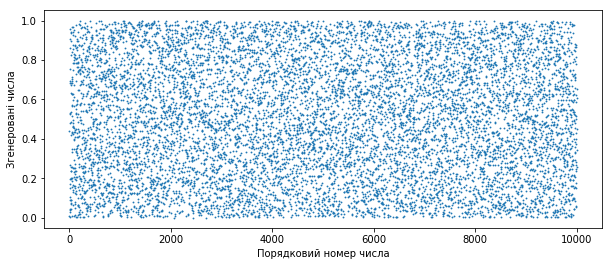

In [55]:
plotDistribution(numsMR, 'Порядковий номер числа', 'Згенеровані числа')

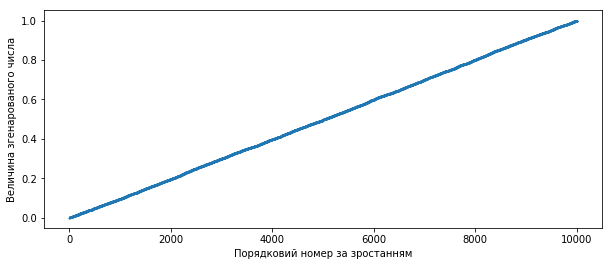

In [54]:
plotDistribution(np.sort(numsMR), 'Порядковий номер за зростанням', 'Величина згенарованого числа')

#### 2) Мультиплікативний метод з цілочисловою арифметикою

In [9]:
def intGenerator():
    M = 477211307
    z = 1
    while True:
        z = (M * z) % 2**32
        yield z / 2**32

gi = intGenerator()

numsMI = np.array([next(gi) for i in range(n)])
print(numsMI)

[0.11110942 0.51851739 0.55555499 ... 0.61920087 0.65658034 0.36892013]


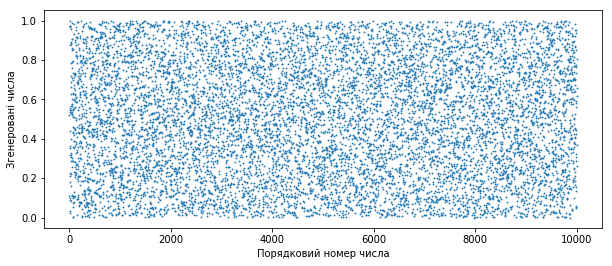

In [56]:
plotDistribution(numsMI, 'Порядковий номер числа', 'Згенеровані числа')

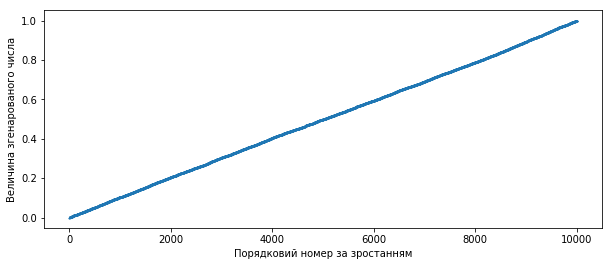

In [60]:
plotDistribution(np.sort(numsMI), 'Порядковий номер за зростанням', 'Величина згенарованого числа')

#### 3) Псевдовипадкова послідовність з неперервним розподілом `GammaDistribution(3,5)`

In [12]:
gd = np.vectorize(lambda x: gammaDist.ppf(x, a=3, scale=5))
numsGD = gd(numsMI)
print(numsGD)

[ 5.77989299 13.74946413 14.53284181 ... 15.97856596 16.90499025
 10.84420967]


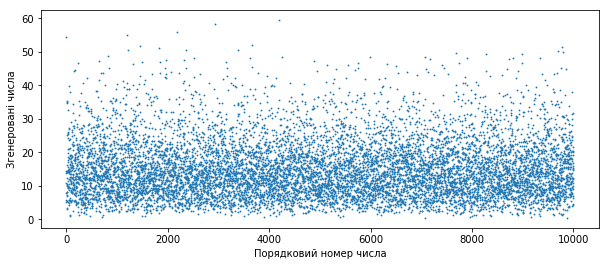

In [57]:
plotDistribution(numsGD, 'Порядковий номер числа', 'Згенеровані числа')

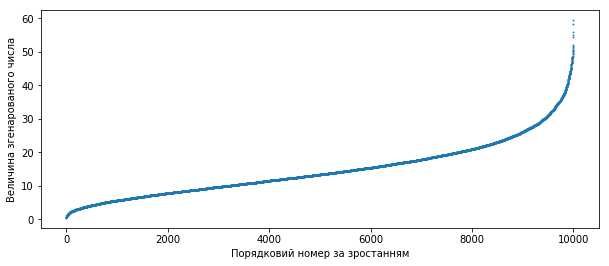

In [61]:
plotDistribution(np.sort(numsGD), 'Порядковий номер за зростанням', 'Величина згенарованого числа')

#### 4) Метод Неймана-Пірсона з розподілом GammaDistribution(3, 5)

In [15]:
def gammaMode(alpha, beta):
    if alpha >= 1:
        return beta * (alpha - 1)
    return 0

def gammaMax(alpha, beta):
    return gammaDist.pdf(gammaMode(alpha, beta), a=alpha, scale=beta)

In [16]:
a = 5
b = 10

maxGamma = gammaMax(3, 5)

def neymanPearson(a, b):
    u1, u2 = next(gi), next(gi)
    y1 = a + (b - a) * u1
    y2 = maxGamma * u2
    while y2 > gammaDist.pdf(y1, a=3, scale=5):
        u1, u2 = next(gi), next(gi)
        y1 = a + (b - a) * u1
        y2 = maxGamma * u2
    return y1

print(neymanPearson(5, 10))

8.64274469553493


#### 5) Генерація отриманих послідовностей за допомогою стандартного генератора Random

1. випадкове число на проміжку [0,1]

In [17]:
seq = np.random.random(n)
print(seq)

[0.40550338 0.6565182  0.57521991 ... 0.42343924 0.39184211 0.09221152]


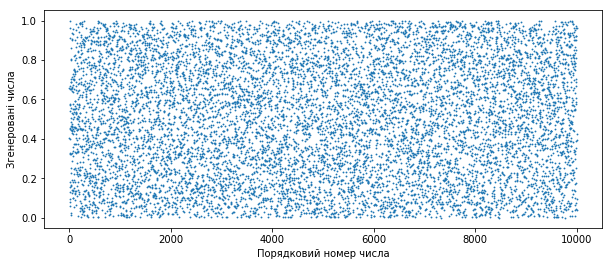

In [58]:
plotDistribution(seq, 'Порядковий номер числа', 'Згенеровані числа')

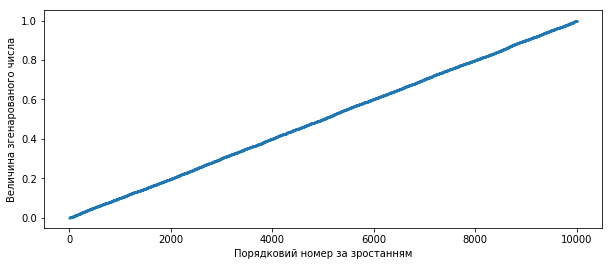

In [62]:
plotDistribution(np.sort(seq), 'Порядковий номер за зростанням', 'Величина згенарованого числа')

2. випадкове число, згенероване за допомогою Гамма-розподілу

In [20]:
seqgamma = np.random.gamma(3, 5, n)
print(seqgamma)

[26.86741268 21.84265673 31.50316609 ... 15.03182162 10.79962939
 19.14968277]


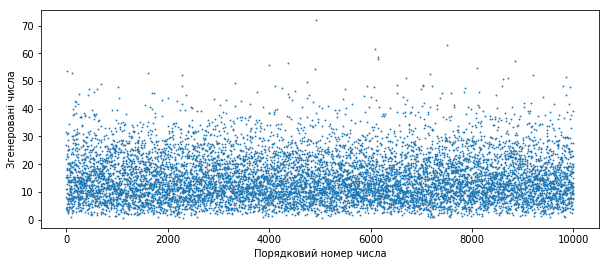

In [59]:
plotDistribution(seqgamma, 'Порядковий номер числа', 'Згенеровані числа')

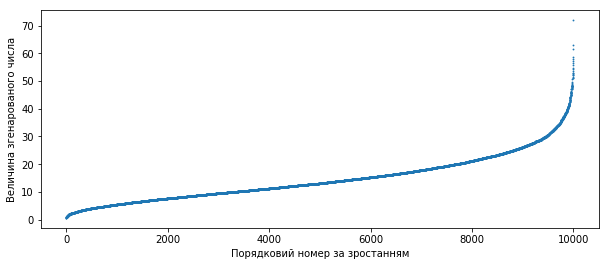

In [63]:
plotDistribution(np.sort(seqgamma), 'Порядковий номер за зростанням', 'Величина згенарованого числа')

3. випадкове число, згенероване на проміжку [a,b]

In [23]:
print(random.uniform(5, 10))

7.051407134479322


#### 6) Побудова графіків *емпіричної* та *теоретичної* функцій розподілу на одному рисунку для пар послідовностей `3` та `5`
Гамма-розподіл та вбудований генератор random (`numsGD`, `seqgamma`)

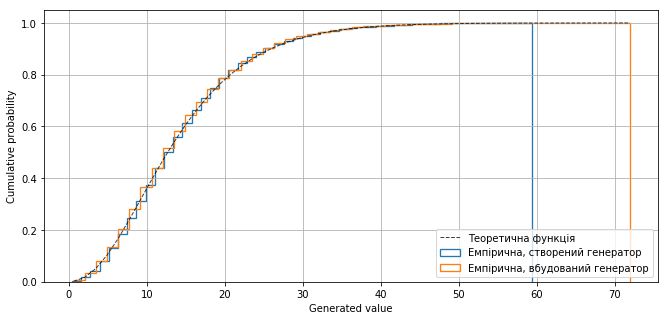

In [24]:
n_bins = 50

fig, ax = plt.subplots(figsize=(11, 5))

# створений генератор
ax.hist(numsGD, n_bins, density=True, histtype='step', linewidth=1.3,
                           cumulative=True, label='Емпірична, створений генератор')

# вбудований генератор
n, bins, patches = ax.hist(seqgamma, n_bins, density=True, histtype='step', linewidth=1.3,
                           cumulative=True, label='Емпірична, вбудований генератор')

# Add a line showing the expected distribution.
y = gammaDist.pdf(bins, a=3, scale=5)
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1, alpha=0.75, label='Теоретична функція')

# tidy up the figure
ax.grid(True)
ax.legend(loc='lower right')
ax.set_xlabel('Generated value')
ax.set_ylabel('Cumulative probability')

plt.show()

#### 7) Моделювання повної групи подій стохастичного експерименту (підкидання двох гральних кубиків)

Кубики підкидаються 1000000 разів

Повна група подій при підкиданні 1го кубика *(6 можливих подій)*: `{1, 2, 3, 4, 5, 6}`

Повна група подій при підкиданні 2х кубиків *(36 можливих подій)*:

In [25]:
eventGroup = []
for i in range(1,7):
    for j in range(1,7):
        num = i*10 + j
        eventGroup.append(num)
        print(num, end='')
        if not (j == 6 and i == 6):
            print(end=', ')

11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 36, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 61, 62, 63, 64, 65, 66

**Алгоритм моделювання повної групи подій**

In [48]:
firstDie = realGenerator()
secondDie = realGenerator()

nd = 1000000

def side(val):
    # кубики мають 6 граней
    val_interval = 1.0 / 6
    for i in range(1, 6):
        if val <= val_interval * i:
            return i
    return 6

def simTwoDice(n):
    dice = []
    for i in range(n):
        f = side(next(firstDie))
        s = side(next(secondDie))
        dice.append(f*10+s)
    return np.array(dice)

simulation = simTwoDice(nd)
print(simulation)

[61 21 35 ... 24 12 62]


Емпіричний розподіл групи подій

In [49]:
events, freq = np.unique(simulation, return_counts=True)
print(events)
print(freq)

[11 12 13 ... 64 65 66]
[27772 27990 27431 ... 27674 27798 27846]


Побудова розподілу

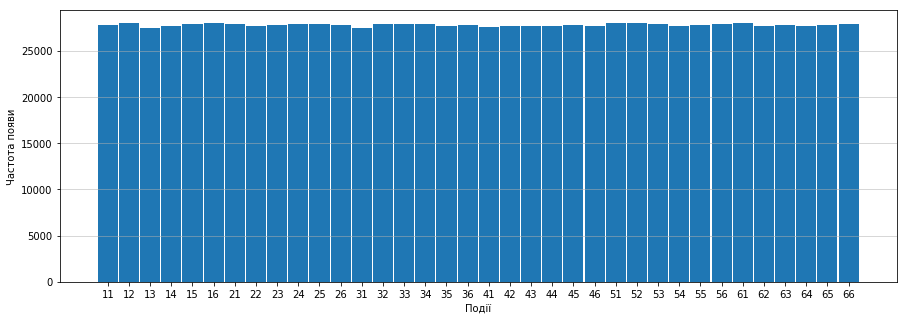

In [50]:
plt.figure(1, figsize=(15, 5))
plt.bar(events.astype(dtype='str'), freq, width=0.95)
plt.xlabel('Події')
plt.ylabel('Частота появи')
plt.grid(True, linewidth=0.5, axis='y')
plt.show()